# Scraping Data

<img src="images/scrap_pipeline.png">

For each year we get the months of that year, then find the days of that month in that specific year, next we move to handle months from 1 to 9 to be 01 to 09, required for start time of scraping, then we handle the direction of that month in that year to save the scrapped tweets inside csv file in that direction, not just for days, we have go deeper in hours of days and scrap data based on some hours of the day, and this help us scraped tweets along the day.

## Work in our private repo github

https://github.com/Abdelrahmanrezk/Crawling-twitter-Data-using-twint_v2/blob/main/twitter_configs.py

https://github.com/Abdelrahmanrezk/Crawling-twitter-Data-using-twint_v2/blob/main/Twitter%20Crawling%202016%20to%202022.ipynb

# Text Pre-processing

<img src="images/Text-preprocess_pipeline.png">

Arabic language is special in its pre-process steps, beside of that the tweets has some of tokens need to handle.

First of all as we get tweet text we get along with its language written in, so first step was to get just the Arabic tweets because some other language like [Urdu and Persian] shared common and have similarity with Arabic language.

Next we have moved to tweets itself, and for each tweet we also detect its language from its text, and this is help us a lot to save only Arabic tweets.

Once we detect that tweet is Arabic, we need to clean it from some special characters, handle more spaces and all of the required preprocessing as in graph.

Lastly we move to the **tokenization**.

# Tokenization

The pre-process we have done before help us in this stage, when we compared different tokenizer in the first days of work, and we use these tokenizer to split our tweets.

## Work in our private repo github

https://github.com/Abdelrahmanrezk/Crawling-twitter-Data-using-twint_v2/blob/main/ara_vec_preprocess_configs.py

https://github.com/Abdelrahmanrezk/Crawling-twitter-Data-using-twint_v2/blob/main/DifferentTokenization.py

https://github.com/Abdelrahmanrezk/Crawling-twitter-Data-using-twint_v2/blob/main/Text-Preprocessing.ipynb

# Word Vector

<img src="images/word_2vec_pipeline.png">

Previously we have deal with Bag of words either binary, count or tf-idf, all of these bag of words was ignoring the context of words, the relationship between near words and its effect on the meaning. 

The BOW was collect all the words into statistical bag of words, then each of these vectorization method assign just one number to the words, like the number of times word appear in sentence or just 1 or 0 if its comes in sentence or not.

But is there is a similarity between words like **hotel and motel** ? in the BOW we dealing with there is zero similarity although they represent the same meaning and comes in similar context.

**But Why BOW work and give us a pretty good accuracy ?**

the BoW with text features model we built (bin, freq, cnt, tfidf), builds a vector per sentence, not word, so tweets(sequence of words in text) with similar words will have 1’s at the same location, so the similarity was between two tweets, document (some sequence of words), **not between words itself**, But ? what about (sparsity, missing sequence, information and context of words) ?

<img src="images/BOW_vec1.png">

**Can you imagine this vector with all of words in your data, and all of these words are 0 because its not appear in the document you process for now and just some numbers for words comes in that document !!**

## BUT Word Vector came to light

Instead of this large statistical Bag of words **to represent each sentence** (with all words of data), we just compress to some fixed length may be just **50 or 100 words !** (solve the sparsity problem), and we can do that by giving each word **index** so when we need any word we get via its index **Later will know why**.

<img src="images/word_vec2.png">

**Why using index while its as we can see has no any information or meaning about the word !?**

We do not use the index its self to represent the word, we use it to get the word from the Embedding matrix we learn about the words in, and as we can see in the other side of the image the words comes from some topic that represent the word in some space, **But We can feed the words to the model** so we feed **one hot vector of all zero except the index of that word in the matrix **.


so We want a mapping from discrete (categorical) space to Vector space, space where the value representing similar meanings are near each others! **This mapping what we called Embedding**

**Word Vector are numerical representation of word semantics or meaning including literal and implied meaning. So word vector can capture the connotation of words like [Peopleness, animalness and even conceptness], and they combine all that into a dense vector(no zeros as in sparse vector with BOW) this dense vector is of floating point values, which enables us for queries and logical reasoning.**

<img src="images/word_vec3.png">
- These **e** are the latten factors represent the word
- Also its the features of the word in some space But !!

**But what these Embedding represent ? how much embedding we need ?**

Lets go back for few seconds in world of machine learning, where these embedding was hand wriiting (designed by people), may be from people know more about the language, or others whose have some knowledge about textual data and can give some scores for these words based on some topics, or based on the occurrence of the words together.

<table>
<tr>
    <td><img src="images/word_vec4.png"></td>
    <td><img src="images/word_vec5.png"></td>
</tr>
</table>

But **This is Machine learning world** What about deep learning ?

- DL = Learn them
- Just set how many Hyperparameter you need (embedding, latent factors, features any of these names as you like).
- Let the network learn these values (embedding, latent factors, features)

## Semantic Queries and analogies

**So let's go deeper with some word2vec models we have to see some of its pretty result.**

Can you imagine that you have some of information, or words related to some topic or names of some ones you know, but you do not remember the specific name of that person or place, but you can give some ituation about, and the **Word2Vec** can give you a very approximation of what you search for your semantic query that you give the ituation about or about the analogies questions as we can see below.

In [1]:
import gensim

In [2]:
model = gensim.models.Word2Vec.load("../CBOW_model/train_word2vec_cbow__window_3_min_count_300")

In [3]:
vocabs = list(model.wv.index_to_key)
print("The number of words the model learn from your dataset are:", len(vocabs))
print(vocabs[:100])
print(model.wv['رابطويب'].shape)

The number of words the model learn from your dataset are: 186507
['حسابشخصي', 'من', 'رابطويب', '#', 'في', ':', 'الله', 'علي', 'لا', '!', 'ما', 'ف', 'اللهم', 'ان', 'ب', 'ع', 'كل', 'ي', ')', '؟', 'ولا', 'انا', 'م', '(', 'اللي', 'ل', 'الي', 'الا', 'عن', 'بس', 'لي', 'مع', 'انت', 'و', 'لك', 'والله', '😂', ',', 'اني', 'هو', 'لو', 'او', 'كان', 'مش', 'هذا', 'بعد', 'اذا', 'يارب', 'يوم', 'له', 'حتي', 'الناس', ';', 'وانا', 'اي', 'فيه', 'الدنيا', '&', 'قلبي', 'عليك', 'عليه', 'شي', 'الحمد', 'وانت', 'اليوم', 'عشان', 'شيء', 'غير', 'الصباح', 'انه', 'خير', 'ا', 'ربي', 'انك', 'بين', 'محمد', 'هي', 'ربنا', 'يعني', 'لم', 'اذكار', 'حاجه', 'كنت', 'الذي', 'اله', 'احد', 'لما', 'واحد', 'وفي', 'لنا', 'بك', 'وان', 'فيها', 'قبل', 'والمساء', 'وهو', 'مره', 'الخير', 'لكن', 'رب']
(300,)


In [4]:
model.wv.most_similar('قابس')

[('القصرين', 0.6576645374298096),
 ('صفاقس', 0.5728908777236938),
 ('قفصه', 0.5371726751327515),
 ('تطاوين', 0.5305324196815491),
 ('المنستير', 0.5236865878105164),
 ('نابل', 0.5214819312095642),
 ('بنزرت', 0.5170920491218567),
 ('جندوبه', 0.5105900764465332),
 ('وهران', 0.4969269633293152),
 ('بجايه', 0.48116734623908997)]

In [5]:
model.wv.most_similar('طنطا')

[('المنصوره', 0.8711553812026978),
 ('الزقازيق', 0.8422937393188477),
 ('اسوان', 0.8063880801200867),
 ('اسيوط', 0.8036909699440002),
 ('المنيا', 0.7726854681968689),
 ('اسكندريه', 0.7653614282608032),
 ('دمنهور', 0.764900803565979),
 ('الفيوم', 0.7460120916366577),
 ('المنوفيه', 0.7423815727233887),
 ('دمياط', 0.7363192439079285)]

In [6]:
model.wv.most_similar('فندق')

[('بفندق', 0.730944812297821),
 ('منتجع', 0.6843217611312866),
 ('وفندق', 0.6325039863586426),
 ('مول', 0.614116370677948),
 ('بلازا', 0.5699888467788696),
 ('شاليه', 0.5637040734291077),
 ('لفندق', 0.5493143796920776),
 ('فنادق', 0.5271930694580078),
 ('منتزه', 0.5092812776565552),
 ('شاليهات', 0.5062549710273743)]

In [7]:
model.wv.most_similar(positive=['ملك', 'امراءه'], negative=['رجل'])

[('ملكه', 0.41999077796936035),
 ('وملكه', 0.3866483271121979),
 ('وملك', 0.3825167715549469),
 ('لملك', 0.35914820432662964),
 ('ياملك', 0.3270847797393799),
 ('اميره', 0.3250289559364319),
 ('بملك', 0.32333946228027344),
 ('حبيبه', 0.3119167685508728),
 ('بملكه', 0.30744314193725586),
 ('ملوك', 0.3049042224884033)]

In [8]:
model.wv.most_similar(positive=['ميسي', 'تريكه'], negative=['صلاح'])

[('الدون', 0.5999741554260254),
 ('كريستيانو', 0.5968264937400818),
 ('رونالدو', 0.590907871723175),
 ('كرستيانو', 0.5784972906112671),
 ('نيمار', 0.5503805875778198),
 ('كريس', 0.5388643741607666),
 ('رونالدينهو', 0.5260710120201111),
 ('مارادونا', 0.5219584703445435),
 ('وميسي', 0.5198914408683777),
 ('راموس', 0.5197929739952087)]

In [9]:
# The word2vec model know that ميسي and النني at same distance as رونالدو وتريزجيه and other Egyption players
model.wv.most_similar(positive=['النني', 'ميسي'], negative=['رونالدو'])

[('تريزيجيه', 0.6895750164985657),
 ('النيني', 0.6815524101257324),
 ('الشناوي', 0.6730372309684753),
 ('عبدالشافي', 0.6410932540893555),
 ('السوليه', 0.6350133419036865),
 ('كاسونجو', 0.6310057640075684),
 ('جيرالدو', 0.6125296354293823),
 ('شيكابالا', 0.6099990010261536),
 ('الونش', 0.6048075556755066),
 ('دونجا', 0.601079523563385)]

In [10]:
model.wv.most_similar('😭')

[('😩', 0.8766147494316101),
 ('☹️', 0.8408313393592834),
 ('😫', 0.8143615126609802),
 ('😔', 0.8086197972297668),
 ('💔', 0.7940607666969299),
 ('\U0001f97a', 0.7897905111312866),
 ('🤦🏻\u200d💔', 0.7822915315628052),
 ('🌚', 0.7778453826904297),
 ('😶', 0.777163565158844),
 ('😢', 0.768022358417511)]

In [11]:
model.wv.most_similar('🤣')

[('😆', 0.802866518497467),
 ('\U0001f92a', 0.7862435579299927),
 ('😁', 0.7819022536277771),
 ('😜', 0.7608166337013245),
 ('\U0001f92d', 0.7607275247573853),
 ('😂', 0.7582506537437439),
 ('😅', 0.7579998970031738),
 ('😏', 0.7514066696166992),
 ('😬', 0.7476720809936523),
 ('😝', 0.7413126230239868)]

In [12]:
model.wv.most_similar('🇰🇼')

[('🇦🇪', 0.6385013461112976),
 ('🇧🇭', 0.5806732177734375),
 ('🇴🇲', 0.5768093466758728),
 ('🇸🇦', 0.5592342615127563),
 ('🇶🇦', 0.5500586628913879),
 ('كويت', 0.5463189482688904),
 ('وشعبها', 0.4935325086116791),
 ('والكويتين', 0.48525169491767883),
 ('*KW*', 0.48066458106040955),
 ('الحبيبه', 0.46540558338165283)]

In [13]:
model.wv.most_similar('🇪🇸')

[('🏴\U000e0067\U000e0062\U000e0065\U000e006e\U000e0067\U000e007f',
  0.5916234850883484),
 ('🇮🇹', 0.5404842495918274),
 ('🇫🇷', 0.5168828368186951),
 ('🇦🇷', 0.5050787925720215),
 ('🇳🇱', 0.4779300093650818),
 ('وفالنسيا', 0.4625059962272644),
 ('🇩🇪', 0.4523812234401703),
 ('🇵🇹', 0.45176205039024353),
 ('والبرتغال', 0.4514895975589752),
 ('SPORT', 0.45084479451179504)]

In [14]:
model.wv.most_similar('😷')

[('🤢', 0.8395892977714539),
 ('\U0001f92e', 0.805376410484314),
 ('😤', 0.6982896327972412),
 ('🤧', 0.6418924331665039),
 ('😖', 0.6386275887489319),
 ('😑', 0.6216031908988953),
 ('😡', 0.6194607615470886),
 ('😫', 0.6168348789215088),
 ('🔪', 0.6117090582847595),
 ('👎🏻', 0.611698567867279)]

In [15]:
model.wv.most_similar('🙏🏼')

[('🙏🏻', 0.9190897941589355),
 ('🙏', 0.8529333472251892),
 ('🙏🏽', 0.819024384021759),
 ('🙌🏻', 0.7919767498970032),
 ('🙏🏻❤️', 0.7821568250656128),
 ('🙏🏻♥️', 0.7794980406761169),
 ('🙌🏼', 0.7552249431610107),
 ('🙏❤', 0.7476827502250671),
 ('🙏🏻💙', 0.7385942935943604),
 ('🙏🏼❤️', 0.7233009934425354)]

In [16]:
model.wv.most_similar('💛')

[('💙', 0.8877499103546143),
 ('\U0001f90d', 0.8294982314109802),
 ('\U0001f9e1', 0.8192111253738403),
 ('🖤', 0.8143652081489563),
 ('💜', 0.8086118698120117),
 ('❤️', 0.8010156750679016),
 ('♥️', 0.7955614328384399),
 ('💗', 0.7517227530479431),
 ('😻', 0.7355905771255493),
 ('💘', 0.7272791862487793)]

In [17]:
model.wv.most_similar('🌻')

[('🌸', 0.7351401448249817),
 ('🌷', 0.7263257503509521),
 ('🌺', 0.7200062274932861),
 ('🍃', 0.7052541375160217),
 ('🌹', 0.6743341684341431),
 ('💐', 0.6151167154312134),
 ('🕊', 0.5917332768440247),
 ('🌿', 0.5900437235832214),
 ('🌹❤', 0.5851139426231384),
 ('❤🌹', 0.5674962997436523)]

In [18]:
model.wv.most_similar('⏰')

[('⏱', 0.8350520730018616),
 ('🕰', 0.6906335949897766),
 ('⌚️', 0.6744349598884583),
 ('⏱️', 0.6575110554695129),
 ('🕘', 0.627112090587616),
 ('⌚', 0.5932911038398743),
 ('🕗', 0.5850368142127991),
 ('🕒', 0.5844873785972595),
 ('🕖', 0.5667195320129395),
 ('00', 0.5319939851760864)]

In [19]:
model.wv.most_similar('📲')

[('📱', 0.6366837620735168),
 ('📞', 0.547763466835022),
 ('واتساب', 0.5317453742027283),
 ('للتواصل', 0.5148635506629944),
 ('وتساب', 0.507297694683075),
 ('للتسجيل', 0.4896295964717865),
 ('WhatsApp', 0.4824824631214142),
 ('☎️', 0.48025646805763245),
 ('٠٠٩١٧٠٨٠٧٨٢٥٧٨', 0.47014737129211426),
 ('واتسب', 0.465564489364624)]

In [20]:
model.wv.most_similar('💸')

[('💵', 0.6109874844551086),
 ('💰', 0.6076492667198181),
 ('كاش', 0.4554022550582886),
 ('🤑', 0.4526485800743103),
 ('شهريا', 0.43424439430236816),
 ('وربح', 0.42930373549461365),
 ('🎁', 0.4238961935043335),
 ('بالمحفظه', 0.39836782217025757),
 ('مشتريات', 0.3973326086997986),
 ('بعموله', 0.396614670753479)]

In [21]:
model.wv.most_similar('📖')

[('📚', 0.5797014832496643),
 ('كتاب', 0.46504756808280945),
 ('📘', 0.4579377770423889),
 ('📕', 0.45251527428627014),
 ('📒', 0.43621087074279785),
 ('سوره', 0.4350302815437317),
 ('📗', 0.4267156720161438),
 ('وقراءه', 0.4170687794685364),
 ('رتل', 0.4137421250343323),
 ('الكهف🌸', 0.408466100692749)]

In [22]:
model.wv.most_similar('📆')

[('🗓', 0.8052121996879578),
 ('📅', 0.7049617171287537),
 ('🗓️', 0.7047621011734009),
 ('الموافق', 0.557779848575592),
 ('⏰', 0.46209901571273804),
 ('المصادف', 0.457782506942749),
 ('المقبل', 0.44337525963783264),
 ('بتاريخ', 0.4397914707660675),
 ('04', 0.43374374508857727),
 ('ذوالحجه', 0.42941543459892273)]

In [23]:
model.wv.most_similar('💉', topn=30)

[('حقنه', 0.42275717854499817),
 ('انسولين', 0.4176076650619507),
 ('استرازينكا', 0.4120599031448364),
 ('💊', 0.40240922570228577),
 ('واللقاح', 0.4018620550632477),
 ('ابره', 0.38729023933410645),
 ('تطعيم', 0.38290613889694214),
 ('التطعيم', 0.3790135979652405),
 ('لعلاج', 0.3749803900718689),
 ('الايدز', 0.374743789434433),
 ('بنج', 0.3714739978313446),
 ('اللقاح', 0.36567190289497375),
 ('كعلاج', 0.3644156754016876),
 ('ابر', 0.364349365234375),
 ('الانفلونزا', 0.35881897807121277),
 ('جرعتين', 0.35615113377571106),
 ('استرازينيكا', 0.35403233766555786),
 ('علاج', 0.35213226079940796),
 ('والاشعه', 0.3516959249973297),
 ('الوقايه', 0.35025978088378906),
 ('لمرض', 0.3496297597885132),
 ('لمرضي', 0.3433901071548462),
 ('البنج', 0.3431037664413452),
 ('والتحاليل', 0.3428897261619568),
 ('والاعصاب', 0.3380063772201538),
 ('فايزر', 0.3376590311527252),
 ('الكحه', 0.33615362644195557),
 ('الحروق', 0.33608943223953247),
 ('القسطره', 0.3344672620296478),
 ('حقن', 0.3343067467212677)]

In [24]:
model.wv.most_similar('ميموري')


[('الميموري', 0.41035017371177673),
 ('النوت', 0.360521525144577),
 ('هارديسك', 0.354240745306015),
 ('تابلت', 0.349079430103302),
 ('لابتوب', 0.3467143774032593),
 ('يوزر', 0.343673974275589),
 ('باسورد', 0.3390958905220032),
 ('بتقنيه', 0.33850616216659546),
 ('ديسك', 0.33043983578681946),
 ('ماسنجر', 0.32844215631484985)]

In [25]:
model.wv.most_similar('نت')

[('انترنت', 0.6124365329742432),
 ('النت', 0.5466646552085876),
 ('مودم', 0.5283547043800354),
 ('راوتر', 0.5118861198425293),
 ('اشتراك', 0.5064742565155029),
 ('رصيد', 0.48674559593200684),
 ('شبكه', 0.4828455448150635),
 ('vpn', 0.47780612111091614),
 ('رسيفر', 0.4563308656215668),
 ('تليفون', 0.4552777111530304)]

In [26]:
model.wv.most_similar('الدراجه')

[('الدراجات', 0.5883486270904541),
 ('دراجته', 0.5175548195838928),
 ('السياره', 0.5007126331329346),
 ('السيارات', 0.45013517141342163),
 ('العربه', 0.4470364451408386),
 ('المرسيدس', 0.44348618388175964),
 ('الحافله', 0.43496739864349365),
 ('المركبه', 0.42679348587989807),
 ('سياره', 0.4107719659805298),
 ('الدباب', 0.396430104970932)]

In [27]:
model.wv.most_similar('شاومي')

[('سامسونج', 0.7198393940925598),
 ('هواوي', 0.7125051021575928),
 ('سامسونغ', 0.657014787197113),
 ('ابل', 0.6173477172851562),
 ('اوبو', 0.6018435955047607),
 ('LG', 0.5795548558235168),
 ('سوني', 0.5480899214744568),
 ('لينوفو', 0.5480666756629944),
 ('مايكروسوفت', 0.5455424785614014),
 ('نوكيا', 0.5372706055641174)]

In [28]:
model.wv.most_similar('A+')

[('+A', 0.7267603874206543),
 ('B+', 0.7241740822792053),
 ('ا+', 0.6940098404884338),
 ('O+', 0.507546067237854),
 ('امتياز', 0.4989811182022095),
 ('الA', 0.49217814207077026),
 ('gpa', 0.4738493263721466),
 ('GPA', 0.47358110547065735),
 ('oral', 0.4734966456890106),
 ('mcq', 0.4452519416809082)]

In [29]:
model.wv.most_similar('🏡')

[('للاجار', 0.4858027398586273),
 ('للايجار', 0.46704375743865967),
 ('للبيع', 0.4504377543926239),
 ('🏠', 0.44241032004356384),
 ('شاليه', 0.43213754892349243),
 ('لايجار', 0.4182172417640686),
 ('🏛', 0.4062213599681854),
 ('وشقه', 0.4005136787891388),
 ('ايجار', 0.3924168050289154),
 ('وايجار', 0.39238062500953674)]

In [30]:
model.wv.most_similar('IT')

[('HR', 0.6573401689529419),
 ('ENT', 0.573662519454956),
 ('management', 0.5456481575965881),
 ('marketing', 0.5314162373542786),
 ('AI', 0.5244337320327759),
 ('business', 0.5167455077171326),
 ('system', 0.5155795812606812),
 ('math', 0.5150174498558044),
 ('team', 0.5092222094535828),
 ('research', 0.5068033337593079)]

In [31]:
model.wv.most_similar('انستجرام')

[('الانستجرام', 0.8885126709938049),
 ('انستاجرام', 0.8573852181434631),
 ('الفيسبوك', 0.8319613933563232),
 ('فيسبوك', 0.7924776673316956),
 ('الانستغرام', 0.7459255456924438),
 ('الانستا', 0.742841899394989),
 ('انستا', 0.7374587655067444),
 ('تويتر', 0.7026540637016296),
 ('توتير', 0.6922999024391174),
 ('سنابشات', 0.6761666536331177)]

In [32]:
model.wv.most_similar('🔑')

[('🗝', 0.4576185345649719),
 ('🔐', 0.38109856843948364),
 ('ومفتاح', 0.37562310695648193),
 ('لابواب', 0.364055871963501),
 ('مفتاح', 0.3546719253063202),
 ('والاحتياطي', 0.3271389305591583),
 ('ويفتحه', 0.3258914351463318),
 ('وقفل', 0.32584044337272644),
 ('والمفتاح', 0.32396167516708374),
 ('♦️', 0.3178187608718872)]

In [33]:
model.wv.most_similar('؟')

[('🤔', 0.8856027126312256),
 ('\U0001f9d0', 0.7835210561752319),
 ('!', 0.7697850465774536),
 ('😳', 0.6982734799385071),
 ('وليش', 0.6604030132293701),
 ('🙄', 0.6550750732421875),
 ('😕', 0.6517845392227173),
 ('😮', 0.5953947305679321),
 ('ياتري', 0.594017505645752),
 ('👀', 0.5899108648300171)]

# Note !

No one need to mention any thing to word2vec, like these words are of places (actually cities), or whose is nearest to some player from egypt to other from Europe.

So word2vec can learn that and much more than your intuition, just give it large enough data that mention all the textual or relative information you need.

## Word Embeddings Look-up

We have moved from the world of machine learning to deep learning to learn about these embedding as we said, just give the model how many of these embedding you need and let the model learn them. 

So how it can learn using the indices we have give to words, to build the Embedding Matrix (Look-up Table), which have word indices in rows and for each word (row), set how many embeddings you need (between 50 - 300 by practice).

<img src="images/word_vec6.png">

**So each index will cause one row to be selected and learned**


## But Who sets all these weights in the table !! ?

With BOW model we was have some of text(reviews, tweets or sentence), and we have the label associated with these sentence either its negative or positive or some thing that we can compare the prediction with and test the loss then applying step by update the wieghts.

But most of the data unlabeled, there is no output for each tweets, its just huge data without labeling. And this take us to the world of **unsupervised learning**, which **Word2Vec model** depends on.

# Word2Vec

We have two types of word2vec one of them to predict surrounding words from the center word which is called **Skip-Gram** and other one to predict the center(target word) from the surrounding word and this is called **Continuous Bag of words**

# Note !!

If we give it a time to read text above, we can notice that **predict !** and **from !**, the output and input, are actually from the data itself, no label is need, the model can learn from the data itself.

Actually we not interest in these prediction itself, we interested about the embedding matrix (Look-Up Table) that the model build and learn from the data, which help us to learn the meaning, semantic and synonyms of words, how related words are close to each other in some spaces and other as we saw above from exampels.
May be now you can imagine how this capability of word2vec can help in apps like [chatbot, search engine, question answering and other tasks].

# Skip-Gram Approach

In skip-gram approach we trying to predict the surrounding window of words from the center word, as we can see in image, the preidcited word words was **[claude, monet, the and grand]** while the input is just the word **painted** !

<img src="images/skip_1.png">

Actually skip-gram are n-grams that contain gaps because we skip some tokens while we predict others.

But how we feed these inputs to the network, if we skip to next window, and take the word monet as input, then the output is one word before because there is no other words before and 2 words after. !



Its like simple neural network of just two layers, **hidden layer** which is build our main **Embedding Matrix**, and consisit of **n nurons as columns**, the **flatten factors(features)** that you need to represent words in, and the **M** rows which the number of **unique words** the vocabulary of your data, as well as same vector dimension of the **one-hot input vector**.

The other layer is the output layer, which also consist of M neurons equal to number of unique word in our data, and we get the word that represent the max probability like in image above.

**So for example if we have like this sentence:**

**sentence = "Claude Monet painted the Grand Canal of Venice in 1806."**

We can build our target matrix like that:

<img src="images/skip_3.png">


## Note !

So we can notice that for word **Claude** there is no previous words, but there are two predicted words after it, and as we moved with our window of 5-words we build the table above.

Each input is **one-hot-vector**, with 1 in the index of the word and 0 for all other places in the vector.

Each word have the chance to be the predicted word for that input, sums all to one, and get the word with the heighest probabilty, then map to 1 to compare with the target table and so on.

# What is Next !

As we can see above the trained neural network of Continuous Bag of words of our model have its own Embedding table, which each word inside represent the semantic meaning of the word.

Thanks to one hot vector and the idea of using index for tokens, as now each row in the weighted (Embedding matrix) represent each word from our unique vocabulary from the data we have. And after training semantically similar words will have similar vectors, **because they were trained to predict similar surrounding words**, and actually This is Purely Magical.

## Note !!

We should start training from begining each time we have new words because the output and input will have differernt number of words.



# Continuous Bag-of-words Approach

While skip-gram predict the surrounding words from the center words, the CBOW is the opposite and predict the center word from the neighbours. So instead of input the center word as one-hot vector, now we will pass the surrounding words as **multi-hot-vector** of ones (1) in index related to these words and 0 in all other places.


<table>
<tr>
    <td><img src="images/cbow_1.png"></td>
    <td><img src="images/cbow_2.png"></td>
</tr>
</table>

**And if we look at how we feed the data into the network, it will be something like in the image below for same sentence we introduced in skip-gram and let's predict the word [painted]**

<img src="images/cbow_3.png">


# Tricks of Word2Vec

## Frequent bigrams

**New York** as we can see some of words comes together a lot in the context, so we can combine these terms into one term separate them by _ like **New_York** or any symbol and let the network learn also from these n-grams, and the reason of that, these combination of words has different meaning than its individual words.

## Subsampling frequent tokens

As well as stop words comes a lot in any tweet or document, while they have some sharing meaning in the text, but not very important meaning, so giving these words less weights will help improve the word2vec model.

## Negative Sampling

To speed up the training of word2vec model, negative sampling comes to light, instead of input one word and predict the surrounding words or the opposite, negative sampling feed two words together and check its validity of these two words comes together within the window then predict 1 other wise predict 0.


## Work in our private repo github

https://github.com/Abdelrahmanrezk/Crawling-twitter-Data-using-twint_v2/blob/main/train_word2vec_from_scratch.py

https://github.com/Abdelrahmanrezk/Crawling-twitter-Data-using-twint_v2/blob/main/one_gram_model.ipynb

https://github.com/Abdelrahmanrezk/Crawling-twitter-Data-using-twint_v2/blob/main/full_gram_from_2_to_3.ipynb



# Graph Results

In [34]:
from word2vec_results import *

In [35]:
print("The number of emojis: ", len(EMOJIS))
print("The number of sentiment words: ", len(SENTIMENT_WORDS))
print("The number of named entity recognition words", len(NER_WORDS))

The number of emojis:  48
The number of sentiment words:  19
The number of named entity recognition words 65


[t-SNE] Computing 18 nearest neighbors...
[t-SNE] Indexed 19 samples in 0.001s...
[t-SNE] Computed neighbors for 19 samples in 0.002s...
[t-SNE] Computed conditional probabilities for sample 19 / 19
[t-SNE] Mean sigma: 5.488573
[t-SNE] KL divergence after 100 iterations with early exaggeration: 33.363457
[t-SNE] KL divergence after 150 iterations: 0.533340
The shape of our word_features is: (19, 2)


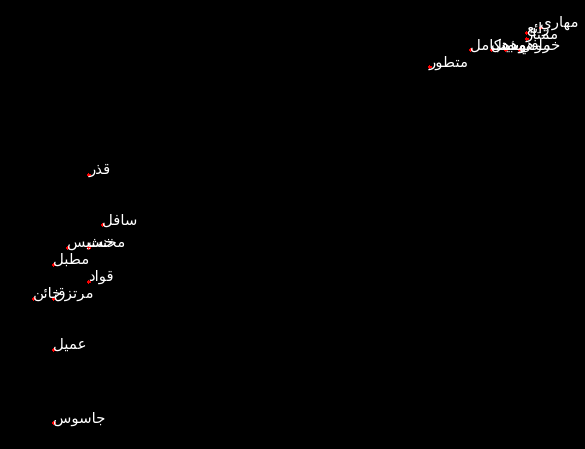

In [36]:
# Reduce the dimension of SENTIMENT_WORDS
tsne_df_scale = tsne_graph(model, SENTIMENT_WORDS, 1500, .03)

_ = init_graph_style()

_ = word_display(tsne_df_scale, SENTIMENT_WORDS, "SENTIMENT_WORDS.png")

[t-SNE] Computing 31 nearest neighbors...
[t-SNE] Indexed 65 samples in 0.001s...
[t-SNE] Computed neighbors for 65 samples in 0.004s...
[t-SNE] Computed conditional probabilities for sample 65 / 65
[t-SNE] Mean sigma: 4.811332
[t-SNE] KL divergence after 250 iterations with early exaggeration: 50.307846
[t-SNE] KL divergence after 1400 iterations: 0.134725
The shape of our word_features is: (65, 2)


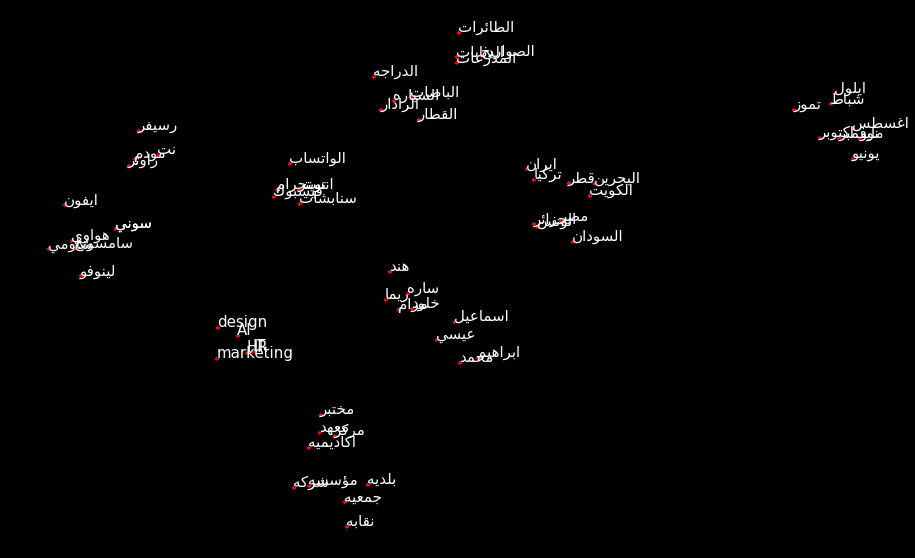

In [37]:
# Reduce the dimension of NER_WORDS
tsne_df_scale = tsne_graph(model, NER_WORDS, 1400, .06)

_ = init_graph_style(figsize=(16, 10))

_ = word_display(tsne_df_scale, NER_WORDS, "NER_WORDS.png")